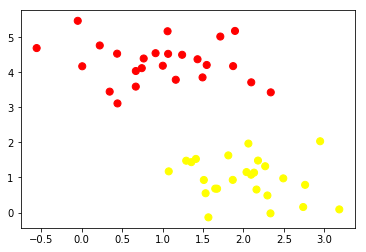

In [26]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

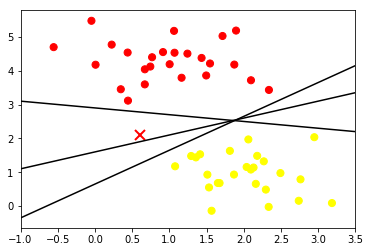

In [27]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

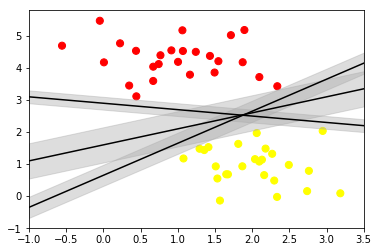

In [28]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

In [29]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [30]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    # .decision_function: Distance of the samples X to the separating hyperplane.
    
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

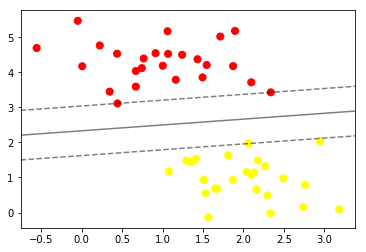

In [31]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

In [32]:
model.support_vectors_

array([[ 0.44359863,  3.11530945],
       [ 2.33812285,  3.43116792],
       [ 2.06156753,  1.96918596]])

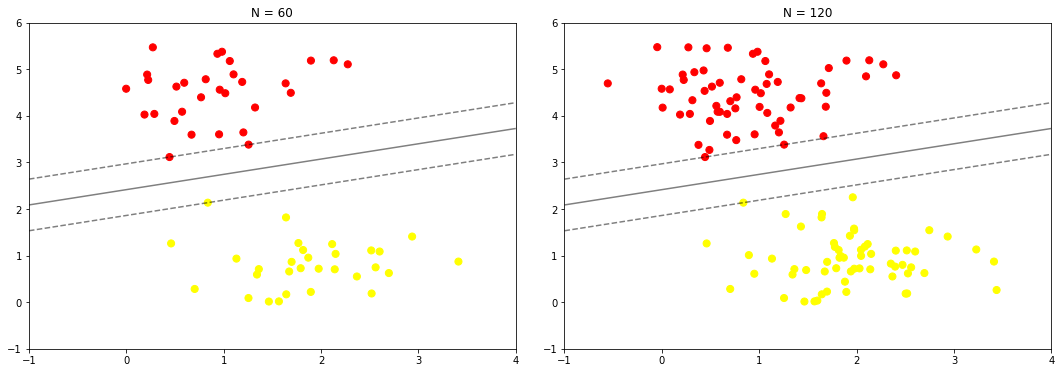

In [33]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

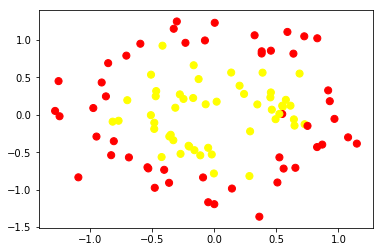

In [48]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.5, noise=.2)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

In [35]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

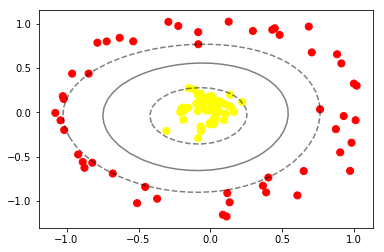

In [36]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)

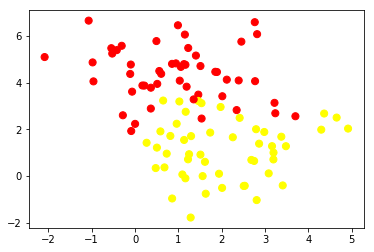

In [37]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

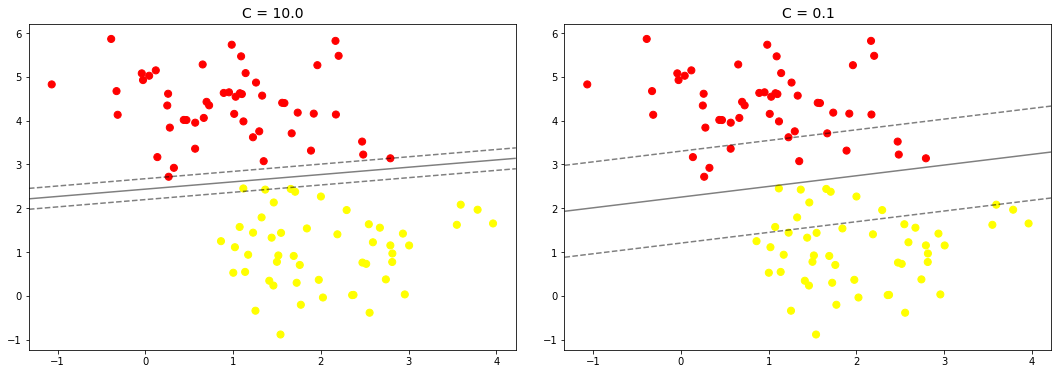

In [38]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

In [39]:
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs

def make_data(N, K):
    X, y = make_blobs(n_samples=N, centers=K,
                  random_state=0, cluster_std=0.90)
    return X, y


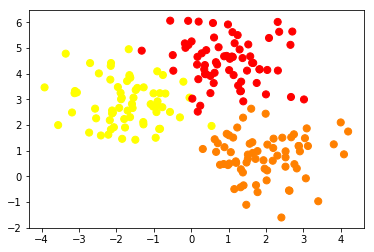

In [40]:
X, y = make_data(200, 3)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

In [41]:
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs

def make_data(N=100, K=3):
    X1, y = make_blobs(n_samples=N, centers=K,
                  random_state=0, cluster_std=0.90)
    
    X2, y = make_blobs(n_samples=N, centers=K,
                  random_state=0, cluster_std=0.90)
    
    X = np.hstack((X1, X2))  
    return X, y

In [42]:
X, y = make_data(N=100, K=3)
np.cov(X.T)

array([[ 3.17319003, -0.73787963,  3.17319003, -0.73787963],
       [-0.73787963,  2.23295141, -0.73787963,  2.23295141],
       [ 3.17319003, -0.73787963,  3.17319003, -0.73787963],
       [-0.73787963,  2.23295141, -0.73787963,  2.23295141]])

In [43]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

In [44]:
X

array([[ -1.42655537e-01,   1.40950981e-01],
       [ -9.68415012e-02,  -6.74186272e-02],
       [ -1.44071403e-01,   9.92889576e-02],
       [ -7.76402814e-01,   5.51092594e-01],
       [ -6.15246427e-01,  -6.63778528e-01],
       [  5.32908334e-02,   3.61660531e-02],
       [  8.74278319e-01,  -3.69164844e-01],
       [ -9.83399889e-02,  -8.91810996e-01],
       [  3.98347609e-02,   1.40505181e-01],
       [ -3.88499036e-01,   1.09425746e+00],
       [ -9.43571669e-01,  -5.29947165e-01],
       [  5.58853259e-01,   8.30373646e-01],
       [ -8.44587995e-01,  -5.44343503e-01],
       [  1.04323899e+00,   1.67355058e-01],
       [  1.85690936e-01,   1.03583711e+00],
       [  8.51587071e-01,  -6.65706359e-01],
       [ -5.57762356e-02,   3.64398049e-02],
       [ -7.92290768e-01,   4.39370662e-01],
       [  9.36104881e-01,  -5.54778262e-01],
       [  6.82558601e-01,  -6.23116065e-01],
       [  1.14345495e-02,  -3.76871953e-02],
       [ -4.88478734e-02,   3.78491027e-02],
       [  